<a href="https://colab.research.google.com/github/yeeeeeun/AI_software/blob/main/ai_software_eda(Age_specific_stroke_incidence_rates_EDA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

케글 데이터셋 가져옴

In [2]:
file_path = '/content/healthcare-dataset-stroke-data.csv'

In [14]:
df = pd.read_csv(file_path)

# 결과 확인하기
print(df)

         id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urban             228.69  36.6  former

필요한 칼럼만 추출

*   Stroke : 뇌졸중
*   Age : 나이



In [15]:
df_filtered = df[['age', 'stroke']]

# 추출된 DataFrame 확인
print(df_filtered.head())

    age  stroke
0  67.0       1
1  61.0       1
2  80.0       1
3  49.0       1
4  79.0       1


In [16]:
# 나이대 구분
bins = [0, 29, 39, 49, 59, 69, 79, 100]
labels = ['20s', '30s', '40s', '50s', '60s', '70s', '80 and above']
df_filtered['age_group'] = pd.cut(df_filtered['age'], bins=bins, labels=labels, right=False)

<ipython-input-16-32ef83a708fb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['age_group'] = pd.cut(df_filtered['age'], bins=bins, labels=labels, right=False)


In [17]:
# 나이대별 데이터 개수 계산
age_group_counts = df_filtered['age_group'].value_counts()

# 결과 출력
age_group_counts

,count
age_group,
20s,1464
50s,833
40s,722
60s,647
30s,635
70s,538
80 and above,271


<ipython-input-18-c5609083d9df>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_grouped = df_filtered.groupby('age_group')['stroke'].mean() * 100  # 발생률을 퍼센트로 계산
<ipython-input-18-c5609083d9df>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_grouped.index, y=age_grouped.values, palette='viridis')


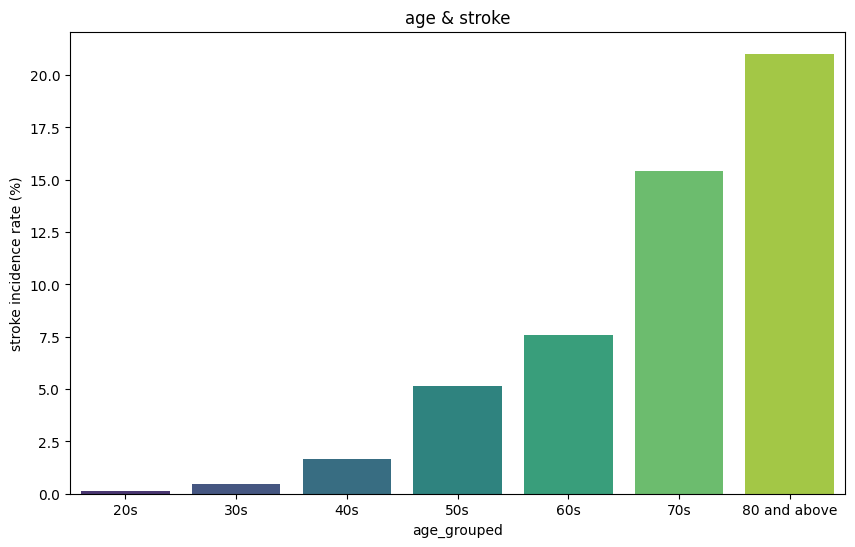

In [18]:
# 나이대별 뇌졸중 발생률 계산
age_grouped = df_filtered.groupby('age_group')['stroke'].mean() * 100  # 발생률을 퍼센트로 계산

# 시각화
plt.figure(figsize=(10,6))
sns.barplot(x=age_grouped.index, y=age_grouped.values, palette='viridis')
plt.title('age & stroke')
plt.xlabel('age_grouped')
plt.ylabel('stroke incidence rate (%)')
plt.show()

## 나이가 많아질수록 뇌졸중 발생 가능성이 급격히 증가한다. 특히, 50대 이후부터 뇌졸중 발생률이 눈에 띄게 상승하며, 80대 이상에서는 가장 높은 발생률을 보인다.

In [8]:
file_path = '/content/healthcare-dataset-stroke-data.csv'

In [9]:
df_filtered = df[['age', 'stroke']]

print(df_filtered.head())

    age  stroke
0  67.0       1
1  61.0       1
2  80.0       1
3  49.0       1
4  79.0       1


<Axes: xlabel='age', ylabel='Density'>

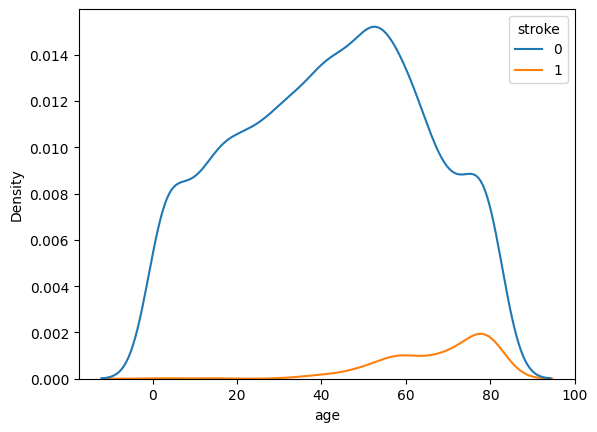

In [42]:
sns.kdeplot(data=df_filtered, x='age', hue='stroke')

## 뇌졸중 발생은 나이와 밀접한 연관이 있으며, 나이가 들수록 발생 가능성이 높아진다.

데이터 그래프를 통해 나이가 많을수록 뇌졸중 발병 환자수가 증가하는 추세를 보임을 알 수 있다.
여기서 50~60대 부근에서 뇌졸중 발병 환자수가 70대보다 많지만, 이는 50-60대에 대한 데이터수 자체가 70대보다 많기 때문으로 보여진다.
따라서 나이는 뇌졸중 발병 확률과 높은 상관관계를 가지고 있다고 할 수 있다.

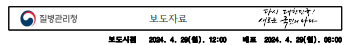

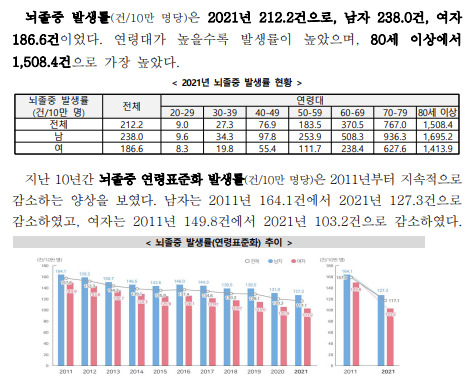

## 질병관리청 자료에 따르면 뇌졸중 발생률은 연령대가 높이질수록 발생률이 높아진다. (2021년 자료)